FTCS - Diff

$$
{{\phi_j^{n} -\phi_j^{n-1} }\over {\Delta t}} + u{{\phi_{j+1}^{n} -\phi_{j-1}^{n}}\over {2 \Delta x}} = 
{K{{\phi_{j+1}^{n-1}} - 2\phi_j^{n-1} + \phi_{j-1}^{n-1}\over{\Delta x^2}}}
$$


CTCS - Diff

$$
{{\phi_j^{n+1} -\phi_j^{n-1} }\over {2 \Delta t}} + u{{\phi_{j+1}^{n} -\phi_{j-1}^{n}}\over {2 \Delta x}} = 
{K{{\phi_{j+1}^{n-1}} - 2\phi_j^{n-1} + \phi_{j-1}^{n-1}\over{\Delta x^2}}}
$$

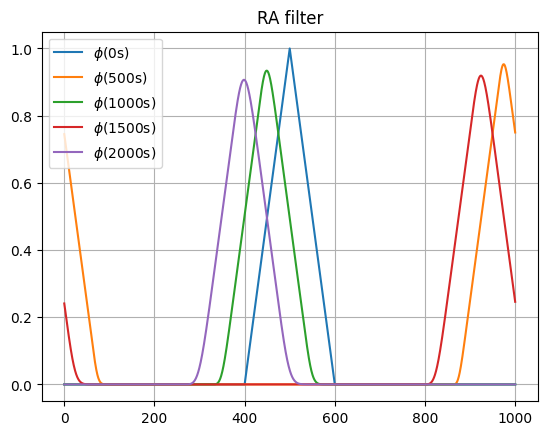

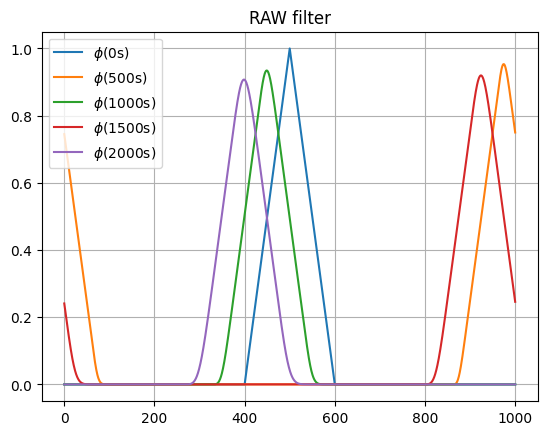

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    if x < 400. or x > 600.:
        return 0.
    elif x < 500:
        return 0.01*(x-400.)
    else: return 2.0 - 0.01*(x-400.)

# advection & diffusion scheme
def ftcsdiff(y0):
    return y0 - 0.5*c*(np.roll(y0, -1) - np.roll(y0, 1)) + dc*(np.roll(y0, -1) - 2*y0 + np.roll(y0, 1))
def ctcsdiff(y0, y1):
    return y0 - c*(np.roll(y1, -1) - np.roll(y1, +1)) + 2*dc*(np.roll(y0, -1) - 2*y0 + np.roll(y0, +1))

# filter
def rafilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + d, y2
def rawfilter(y0, y1, y2):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + beta*d, y2 - (beta - 1)*d

# main looop
def advecdiff(x0, y0, filter):
    t = 0
    plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    y1 = ftcsdiff(y0)
    while t < duration:
        t = t + dt
        y2 = ctcsdiff(y0, y1)        
        if filter == "raw":
            y0, y1 = rawfilter(y0, y1, y2)
        else: y0, y1 = rafilter(y0, y1, y2)
        if t % tinterval < dt:
            plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    plt.legend()
    plt.grid()
    plt.show()
    
# inital condition
dt = 0.1; k = 0.029; dx = 0.5; u = 0.95 # control vars
c = u*dt/dx; dc = k*dt/dx**2 # auxiliary vars
alpha = 0.1; beta = 0.53 # filter
tinterval = 500; duration = 2000+10 # time
x0 = np.arange(0, 1000+dx, dx)
y0 = np.vectorize(func)(x0)
    
# run
plt.title("RA filter")
advecdiff(x0, y0, "ra")
plt.title("RAW filter")
advecdiff(x0, y0, "raw")


When increase $\Delta x$ resolution, we also need to reduce time step to make sure the scheme violate the CFL condition.

$$|c| = |u|\Delta t \le 1 $$